Clasificación del modelo Random Forest:
              precision    recall  f1-score   support

     Anómalo       1.00      1.00      1.00      1082
      Normal       1.00      1.00      1.00      1086

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168

Matriz de confusión:
[[1077    5]
 [   0 1086]]


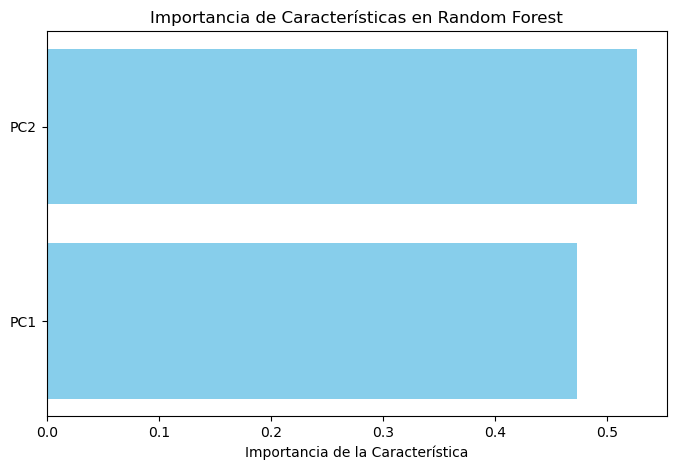

In [337]:
#RANDOM FOREST
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoRamdomF basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoRamdomF'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoRamdomF']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)
print("Clasificación del modelo Random Forest:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de importancia de características
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(columnas_pca, importances, color='skyblue')
plt.xlabel("Importancia de la Característica")
plt.title("Importancia de Características en Random Forest")
plt.show()


Clasificación del modelo Random Forest (Sin SMOTE):
              precision    recall  f1-score   support

     Anómalo       1.00      1.00      1.00        93
      Normal       1.00      1.00      1.00      1080

    accuracy                           1.00      1173
   macro avg       1.00      1.00      1.00      1173
weighted avg       1.00      1.00      1.00      1173

Matriz de confusión:
[[  93    0]
 [   0 1080]]


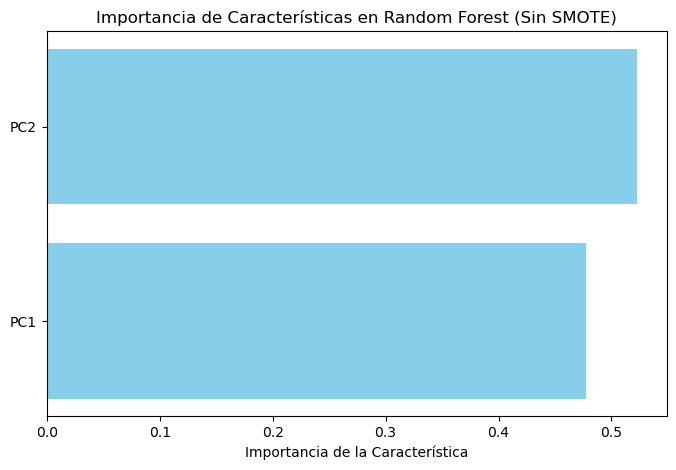

In [338]:
#RANDOM FOREST SIN SMOTE
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoRamdomF2 basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoRamdomF2'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest sin SMOTE
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoRamdomF2']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)
print("Clasificación del modelo Random Forest (Sin SMOTE):")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de importancia de características
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(columnas_pca, importances, color='skyblue')
plt.xlabel("Importancia de la Característica")
plt.title("Importancia de Características en Random Forest (Sin SMOTE)")
plt.show()
